# Tutorial 5

- Name: Siddhant Midha
- Roll no.: 200070078
- *Declaration*. I have adhered to the academic code of conduct and will do so in the future as well.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm
from numpy import sqrt, pi
plt.rcParams.update({'font.size': 22 })
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from scipy.sparse import csr_matrix
from qutip import *
import scipy

# Hartree-Fock Mean-field theory

**Fermi-Hubbard Model**


Hamiltonian is:
\begin{equation}
\mathcal{H} = -t\sum\limits_{\langle ij \rangle,\sigma}(\hat{c}^\dagger_{i\sigma}\hat{c}_{j\sigma} + h.c)  + U\sum\limits_{i }(\hat{n}_{i,\uparrow}-1/2)(\hat{n}_{i,\downarrow}-1/2) - \mu\sum_{i}(\hat{n}_{i,\uparrow} + \hat{n}_{i,\downarrow})
\end{equation}
where, t is the hopping term, while U is the on-site Hubbard (density-density) interaction term. $\mu$ is the chemical potential for the system. $c^\dagger_{i\sigma}, c_{i\sigma}$ are the usual fermionic creation and annihilation operators for spin '$\sigma$' (+1/2 or -1/2).

-------------------------

**Aim**: To find the ground states using Hartree-Fock mean-field approximation to the Hubbard term.

-------------------------

#### Mean-Field approximation


Hartree-Fock Decoupling scheme of the Hubbard term (Mean-field):

\begin{equation}
(\hat{n}_{i,\sigma}-1/2)(\hat{n}_{i,\sigma^\prime}-1/2) \approx \langle (\hat{n}_{i,\sigma}-1/2) \rangle (\hat{n}_{i,\sigma^\prime}-1/2) +  (\hat{n}_{i,\sigma}-1/2)\langle (\hat{n}_{i,\sigma^\prime}-1/2) \rangle  - \langle (\hat{n}_{i,\sigma}-1/2) \rangle \langle (\hat{n}_{i,\sigma^\prime} -1/2)\rangle.
\end{equation}

Where, $\langle ... \rangle$ denotes the expectation value w.r.t to the ground state (at zero temperatures). 

Substituting the above mean-field scheme into the Hamiltonian we get,
\begin{equation}
\mathcal{H}_{MF} = - t\sum\limits_{\langle ij \rangle,\sigma}\hat{c}^\dagger_{i\sigma}\hat{c}_{j\sigma} + h.c  - \sum_{i}( \tilde{\mu}_{i,\uparrow}\hat{n}_{i,\uparrow} +  \tilde{\mu}_{i,\downarrow}\hat{n}_{i,\downarrow}),
\end{equation}
where,
\begin{equation}
\tilde{\mu}_{i,\uparrow} = \mu - U(\langle n_{i,\downarrow} \rangle -1/2), \quad \tilde{\mu}_{i,\downarrow} = \mu - U(\langle n_{i,\uparrow}\rangle-1/2)
\end{equation}

Note that $\mathcal{H}_{MF}$ is block-diagonal in the spin index $\sigma$. Note also that the up spins effective chemical potential is related to down spins occupation number. The information of Hubbard interaction is stored as mean-fields in this way.

**Implementation of Mean-field scheme**

   1. Start with random $\{\langle n_{i,\sigma}\rangle\}$ ordering (or some other ordering).  
   2. Diagonalize the Hamiltonian with the newly transformed single particle basis denoted as $D$, such that $C = TD$.
   
$$C^\dagger = (C^\dagger_\uparrow, C^\dagger_\downarrow)$$
$$C^\dagger_{\sigma} = (\hat{c}^\dagger_{1,\sigma}, \hat{c}^\dagger_{2,\sigma},... , \hat{c}^\dagger_{N,\sigma})$$
           
Due to the block-diagonal structure in the spin index, even $T$ will be block-diagonal in the same index. Practically, you can independently diagonalize the two blocks if you wish. Also, the above diagonalization can be performed in the single-particle sector itself (thereby making the fermion sign issue moot in this tutorial as opposed to the previous tutorial), and then correctly filling as many single-particle eigenstates ("from the bottom") up to the correct number of fermions.
           
   3. Calculate the new values of $\{\langle n_{i,\sigma}\rangle\}$ by taking the ground state ($\psi_0$) expectation value as,
   
$$\langle n_{i,\sigma}\rangle = \langle \psi_0 | \hat{n}_{i,\sigma}  |\psi_0 \rangle$$
  $$|\psi_0 \rangle = \prod_{\lambda,\sigma \; \in \; \text{occ. single-particle levels}} \hat{d}^\dagger_{\lambda,\sigma} | 0 \rangle \quad \quad$$
           
where the ground state is in the correct filling sector (half filled fermionic sector, e.g. for N=4, #fermions=4, etc.). **Note, due to difference in $\tilde{\mu}_{i,\uparrow}$ and $\tilde{\mu}_{i,\downarrow}$, the number of occupied up-spin single-particle states may be different than down-spin single-particle states**.
           
   4. Check convergence (w.r.t previous iteration) is achieved or not with a tolerance (e.g. 1e-6).
       * If converged: STOP
       * If not go to step 2 and repeat untill the above untill converged.
       
   **Note : Stable state correspond to convergence of both on-site mean fields and total energy.**
       

## Exercise 1: 2D Hubbard model (Take a 4x4 lattice)
   
   * Plot the convergence of on-site HF mean-fields and total (HF mean-field) energy versus no. of iterations.
     In Step 1 mentioned above, along with initializing to random spin arrangements, also consider three specific initial orderings and check for convergence:
     
     1. charge ordering : This arrangement is characterized by assigning electron densities to each site 
        i and spin $\sigma$ based on a specific pattern. For example : $ n_{i,\sigma}= n_{i,\sigma^{'}}=           0.6*(i $%$ 2) + 0.4*((i+1)$%$2) $
        
     2. anti-ferro ordering : In this configuration, the electron density at each site alternates between two      values in an anti-ferromagnetic pattern. For example: $ n_{i,\sigma} = 0.9*(i$%$2) + 0.1*((i+1)$%$2)$ and      $n_{i,\sigma^{'}}=1-n_{i,\sigma}$
     
     3. ferro ordering :Here, all spins are aligned, leading to a uniform electron density distribution. For example : $ n_{i,\sigma} = 0.9$ and $n_{i,\sigma^{'}}=1-n_{i,\sigma}$
     
<!--      Find the energy for each ordering and check which one gives the lowest energy. -->
     
     
   * Obtain the ground state energy and the ground state ordering corresponding to the "half filling" case for different $U = 0.1,0.5,1.0,2.0,5.0$. Take $\mu = 0$.
   
   * Now take a chain of length L = 4 at half filling. How does the HF approximation compare with full ED solution for different $U$ values?
     
        **Note HF will naturally be a good approximation when U is small, since U -> 0 is a effectively single-particle Hamiltonian .**

In [93]:
def h_1d(t,mu_arr):
    L = len(mu_arr)
    h = np.diag(mu_arr) + (-t) * (np.diag(np.ones(L-1),1) + np.diag(np.ones(L-1),-1))
    return h

def hop_1d(t,L):
    return -t * np.eye(L)

def h_2d(t,mu_mat):
    L, L = np.shape(mu_mat)
    h = np.zeros((L ** 2, L ** 2))
    for i in range(L): #iterating rows
        h[i * L : (i+1) * L,i * L : (i+1) * L] = h_1d(t,mu_mat[i,:]) #might need to change i,: to :,i
    h += np.kron(np.diag(np.ones(L-1),1)+ np.diag(np.ones(L-1),-1),hop_1d(t,L))
    return h

def get_nmat(psi2d):
    twoLsquare = len(psi2d)
    L = int(sqrt(twoLsquare/2))
    nmat = np.zeros((L,L,2))

    for k in range(L**2): 
        # index to 2D mat mapping
        row = k // L 
        column = k % L 

        n_op_up = np.zeros((twoLsquare,twoLsquare))
        n_op_down = np.zeros((twoLsquare,twoLsquare))
        n_op_up[k,k] = 1 
        n_op_down[k+L**2,k+L**2] = 1 

        exp_val_up = n_op_up @ psi2d 
        exp_val_up = np.conjugate(np.transpose(psi2d)) @ exp_val_up #should be a scalar now
        nmat[row,column,0] = exp_val_up

        exp_val_down = n_op_down @ psi2d 
        exp_val_down = np.conjugate(np.transpose(psi2d)) @ exp_val_down #should be a scalar now
        nmat[row,column,1] = exp_val_down

    return nmat

def get_new_mu(psi2darr,U,mu):
    twoLsq, num_states = np.shape(psi2darr)
    L = int(sqrt(twoLsq/2))
    nmat = np.zeros((L,L,2))
    for i in range(num_states):
        nmat += get_nmat(psi2darr[:,i])
    newmu = mu - U * (nmat - 0.5)
    return newmu 

# random ordering

In [94]:
mu = 0 
U = 1
t = 1 
L = 4
n_up_init = np.random.rand(L,L)
n_down_init = np.random.rand(L,L)
n_mat_init = np.zeros((L,L,2))
n_mat_init[:,:,0] = n_up_init 
n_mat_init[:,:,1] = n_down_init 

mu_init = mu - U * (n_mat_init - 1/2)

h_up = h_2d(t,mu_init[:,:,0])
h_down = h_2d(t,mu_init[:,:,1])

h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
eigenvalues, eigenvectors = np.linalg.eig(h)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues= eigenvalues[sorted_indices]
sorted_eigenvectors= eigenvectors[:, sorted_indices]
gs_energy_init = np.sum(sorted_eigenvalues[:L**2])


conv_fields = 100
conv_fields_arr = []

conv_energy = 100
conv_energy_arr = []

while conv_fields + conv_energy > 1e-12:
    h_up = h_2d(t,mu_init[:,:,0])
    h_down = h_2d(t,mu_init[:,:,1])

    h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
    eigenvalues, eigenvectors = np.linalg.eig(h)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues= eigenvalues[sorted_indices]
    sorted_eigenvectors= eigenvectors[:, sorted_indices]
    gs_energy_new = np.sum(sorted_eigenvalues[:L**2])

    new_mu = get_new_mu(sorted_eigenvectors[:,:L**2],U,mu)

    conv_fields = np.linalg.norm(new_mu-mu_init)
    conv_energy = np.linalg.norm(gs_energy_new - gs_energy_init)
    gs_energy_init = gs_energy_new
    mu_init = new_mu
    conv_fields_arr.append(conv_fields)
    conv_energy_arr.append(conv_energy)

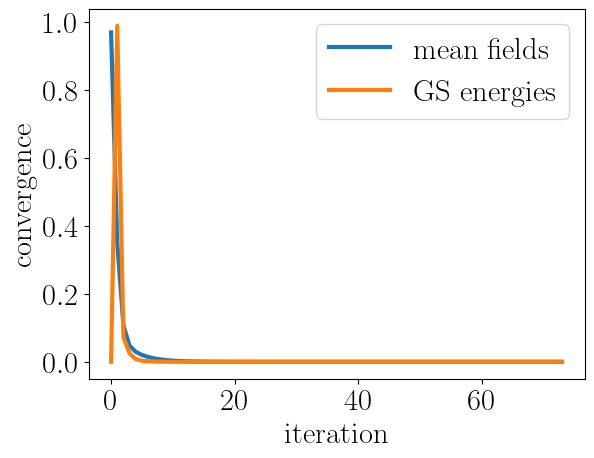

In [98]:
plt.plot(conv_fields_arr,label='mean fields',linewidth=3)
plt.plot(conv_energy_arr,label='GS energies',linewidth=3)
plt.xlabel('iteration')
plt.ylabel('convergence')
plt.legend()

# charge ordering

In [99]:
mu = 0 
U = 1
t = 1 
L = 4
n_up_init = np.zeros((L,L))
for k in range(L**2):
    row = k // L 
    column = k % L 
    n_up_init[row, column] = 0.6*(k % 2) + 0.4*((k+1)%2)
    
n_down_init = n_up_init
n_mat_init = np.zeros((L,L,2))
n_mat_init[:,:,0] = n_up_init 
n_mat_init[:,:,1] = n_down_init 

mu_init = mu - U * (n_mat_init - 1/2)

h_up = h_2d(t,mu_init[:,:,0])
h_down = h_2d(t,mu_init[:,:,1])

h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
eigenvalues, eigenvectors = np.linalg.eig(h)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues= eigenvalues[sorted_indices]
sorted_eigenvectors= eigenvectors[:, sorted_indices]
gs_energy_init = np.sum(sorted_eigenvalues[:L**2])


conv_fields = 100
conv_fields_arr = []

conv_energy = 100
conv_energy_arr = []

while conv_fields + conv_energy > 1e-12:
    h_up = h_2d(t,mu_init[:,:,0])
    h_down = h_2d(t,mu_init[:,:,1])

    h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
    eigenvalues, eigenvectors = np.linalg.eig(h)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues= eigenvalues[sorted_indices]
    sorted_eigenvectors= eigenvectors[:, sorted_indices]
    gs_energy_new = np.sum(sorted_eigenvalues[:L**2])

    new_mu = get_new_mu(sorted_eigenvectors[:,:L**2],U,mu)

    conv_fields = np.linalg.norm(new_mu-mu_init)
    conv_energy = np.linalg.norm(gs_energy_new - gs_energy_init)
    gs_energy_init = gs_energy_new
    mu_init = new_mu
    conv_fields_arr.append(conv_fields)
    conv_energy_arr.append(conv_energy)

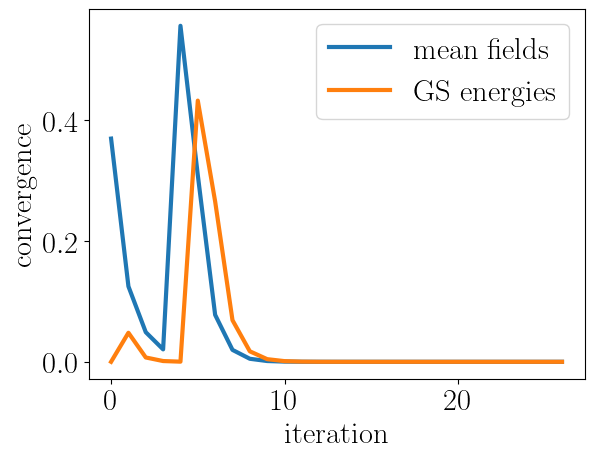

In [100]:
plt.plot(conv_fields_arr,label='mean fields',linewidth=3)
plt.plot(conv_energy_arr,label='GS energies',linewidth=3)
plt.xlabel('iteration')
plt.ylabel('convergence')
plt.legend()

# af ordering

In [101]:
mu = 0 
U = 1
t = 1 
L = 4
n_up_init = np.zeros((L,L))
for k in range(L**2):
    row = k // L 
    column = k % L 
    n_up_init[row, column] = 0.9*(k%2) + 0.1*((k+1)%2)
    
n_down_init = 1 - n_up_init
n_mat_init = np.zeros((L,L,2))
n_mat_init[:,:,0] = n_up_init 
n_mat_init[:,:,1] = n_down_init 

mu_init = mu - U * (n_mat_init - 1/2)

h_up = h_2d(t,mu_init[:,:,0])
h_down = h_2d(t,mu_init[:,:,1])

h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
eigenvalues, eigenvectors = np.linalg.eig(h)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues= eigenvalues[sorted_indices]
sorted_eigenvectors= eigenvectors[:, sorted_indices]
gs_energy_init = np.sum(sorted_eigenvalues[:L**2])


conv_fields = 100
conv_fields_arr = []

conv_energy = 100
conv_energy_arr = []

while conv_fields + conv_energy > 1e-12:
    h_up = h_2d(t,mu_init[:,:,0])
    h_down = h_2d(t,mu_init[:,:,1])

    h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
    eigenvalues, eigenvectors = np.linalg.eig(h)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues= eigenvalues[sorted_indices]
    sorted_eigenvectors= eigenvectors[:, sorted_indices]
    gs_energy_new = np.sum(sorted_eigenvalues[:L**2])

    new_mu = get_new_mu(sorted_eigenvectors[:,:L**2],U,mu)

    conv_fields = np.linalg.norm(new_mu-mu_init)
    conv_energy = np.linalg.norm(gs_energy_new - gs_energy_init)
    gs_energy_init = gs_energy_new
    mu_init = new_mu
    conv_fields_arr.append(conv_fields)
    conv_energy_arr.append(conv_energy)

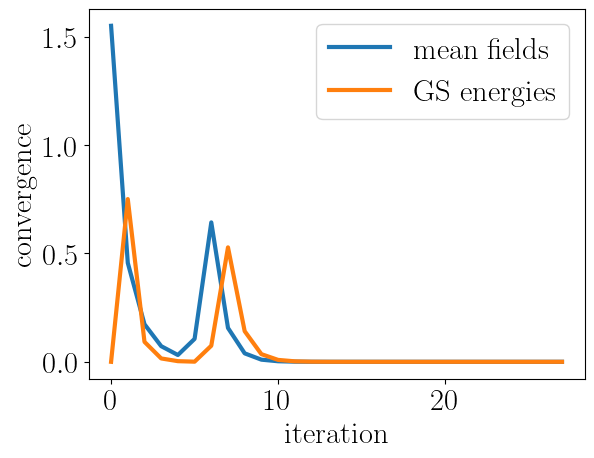

In [102]:
plt.plot(conv_fields_arr,label='mean fields',linewidth=3)
plt.plot(conv_energy_arr,label='GS energies',linewidth=3)
plt.xlabel('iteration')
plt.ylabel('convergence')
plt.legend()

# ferro ordering

In [106]:
mu = 0 
U = 1
t = 1 
L = 4
n_up_init = np.zeros((L,L)) + 0.9
n_down_init = 1 - n_up_init
n_mat_init = np.zeros((L,L,2))
n_mat_init[:,:,0] = n_up_init 
n_mat_init[:,:,1] = n_down_init 

mu_init = mu - U * (n_mat_init - 1/2)

h_up = h_2d(t,mu_init[:,:,0])
h_down = h_2d(t,mu_init[:,:,1])

h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
eigenvalues, eigenvectors = np.linalg.eig(h)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues= eigenvalues[sorted_indices]
sorted_eigenvectors= eigenvectors[:, sorted_indices]
gs_energy_init = np.sum(sorted_eigenvalues[:L**2])


conv_fields = 100
conv_fields_arr = []

conv_energy = 100
conv_energy_arr = []
ctr = 0
while conv_fields + conv_energy > 1e-6:
    h_up = h_2d(t,mu_init[:,:,0])
    h_down = h_2d(t,mu_init[:,:,1])

    h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
    eigenvalues, eigenvectors = np.linalg.eig(h)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues= eigenvalues[sorted_indices]
    sorted_eigenvectors= eigenvectors[:, sorted_indices]
    gs_energy_new = np.sum(sorted_eigenvalues[:L**2])

    new_mu = get_new_mu(sorted_eigenvectors[:,:L**2],U,mu)

    conv_fields = np.linalg.norm(new_mu-mu_init)
    conv_energy = np.linalg.norm(gs_energy_new - gs_energy_init)
    gs_energy_init = gs_energy_new
    mu_init = new_mu
    conv_fields_arr.append(conv_fields)
    conv_energy_arr.append(conv_energy)

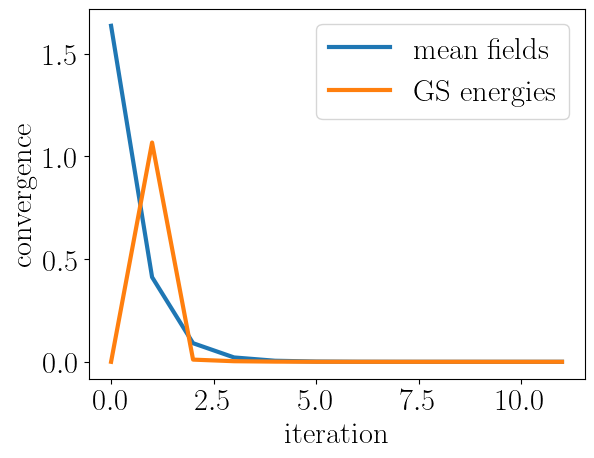

In [107]:
plt.plot(conv_fields_arr,label='mean fields',linewidth=3)
plt.plot(conv_energy_arr,label='GS energies',linewidth=3)
plt.xlabel('iteration')
plt.ylabel('convergence')
plt.legend()

In [129]:
def do_HF(U):
    mu = 0 
    t = 1 
    L = 4
    n_up_init = np.random.rand(L,L)
    n_down_init = np.random.rand(L,L)
    n_mat_init = np.zeros((L,L,2))
    n_mat_init[:,:,0] = n_up_init 
    n_mat_init[:,:,1] = n_down_init 

    mu_init = mu - U * (n_mat_init - 1/2)

    h_up = h_2d(t,mu_init[:,:,0])
    h_down = h_2d(t,mu_init[:,:,1])

    h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
    eigenvalues, eigenvectors = np.linalg.eig(h)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues= eigenvalues[sorted_indices]
    sorted_eigenvectors= eigenvectors[:, sorted_indices]
    gs_energy_init = np.sum(sorted_eigenvalues[:L**2])


    conv_fields = 100
    conv_fields_arr = []

    conv_energy = 100
    conv_energy_arr = []

    while conv_fields + conv_energy > 1e-8:
        h_up = h_2d(t,mu_init[:,:,0])
        h_down = h_2d(t,mu_init[:,:,1])

        h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
        eigenvalues, eigenvectors = np.linalg.eig(h)
        sorted_indices = np.argsort(eigenvalues)
        sorted_eigenvalues= eigenvalues[sorted_indices]
        sorted_eigenvectors= eigenvectors[:, sorted_indices]
        gs_energy_new = np.sum(sorted_eigenvalues[:L**2])

        new_mu = get_new_mu(sorted_eigenvectors[:,:L**2],U,mu)

        conv_fields = np.linalg.norm(new_mu-mu_init)
        conv_energy = np.linalg.norm(gs_energy_new - gs_energy_init)
        gs_energy_init = gs_energy_new
        mu_init = new_mu
        conv_fields_arr.append(conv_fields)
        conv_energy_arr.append(conv_energy)
    return gs_energy_new, new_mu



# different $U$

GS energy = -21.931387535224623


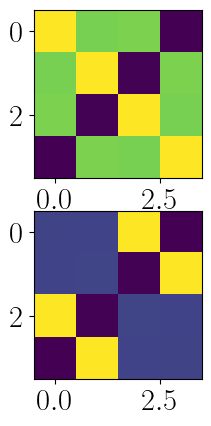

In [130]:
gs_energy_new, new_mu = do_HF(U=0.1)
print('GS energy = ' + str(gs_energy_new))
f, axarr = plt.subplots(2)
axarr[0].imshow(new_mu[:,:,0],label='up')
axarr[1].imshow(new_mu[:,:,1],label='down')


GS energy = -22.13580999884295


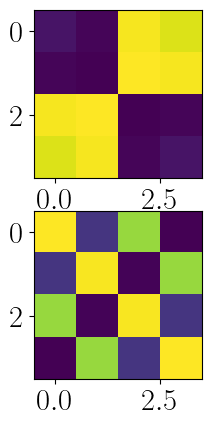

In [131]:
gs_energy_new, new_mu = do_HF(U=0.5)
print('GS energy = ' + str(gs_energy_new))
f, axarr = plt.subplots(2)
axarr[0].imshow(new_mu[:,:,0],label='up')
axarr[1].imshow(new_mu[:,:,1],label='down')


GS energy = -22.409919787013674


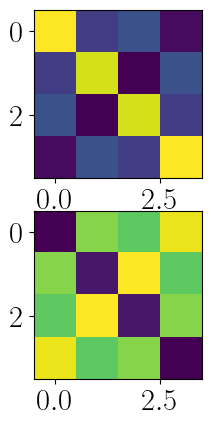

In [132]:
gs_energy_new, new_mu = do_HF(U=1)
print('GS energy = ' + str(gs_energy_new))
f, axarr = plt.subplots(2)
axarr[0].imshow(new_mu[:,:,0],label='up')
axarr[1].imshow(new_mu[:,:,1],label='down')


GS energy = -23.04039863030698


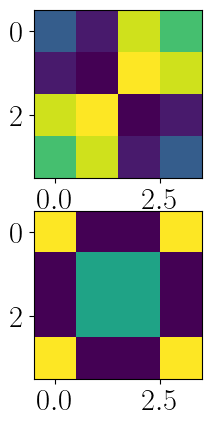

In [133]:
gs_energy_new, new_mu = do_HF(U=2)
print('GS energy = ' + str(gs_energy_new))
f, axarr = plt.subplots(2)
axarr[0].imshow(new_mu[:,:,0],label='up')
axarr[1].imshow(new_mu[:,:,1],label='down')


GS energy = -40.41882862116863


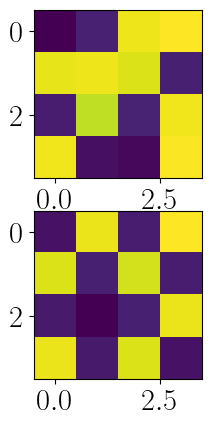

In [134]:
gs_energy_new, new_mu = do_HF(U=5)
print('GS energy = ' + str(gs_energy_new))
f, axarr = plt.subplots(2)
axarr[0].imshow(new_mu[:,:,0],label='up')
axarr[1].imshow(new_mu[:,:,1],label='down')


# ed v. hf

In [139]:
#helper functions 

# full space dictionary (strings)
def create_statedict_total(L):
    D = int(2 ** L)  
    states_dict = {}
    ctr = 0
    for i in range(D):
        for j in range(D):
            up = (bin(i)[2:])
            down = (bin(j)[2:])
            up = '0'*(L-len(up)) + up 
            down = '0'*(L-len(down)) + down 
            states_dict[ctr] = [up,down] 
            ctr += 1
    return states_dict

# spinless space dictionary (strings)
def create_statedict_single(L):
    d = 2 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    states_dict = {}
    for i in range((D)):
        state = bin(i)[2:]
        state = '0'*(L-len(state)) + state 
        states_dict[i] = state 
    return states_dict

# binary search for spinless space
def find_ind_single(state,lookup):
    #state is in binary
    low = 0
    high = len(lookup)
    mid = int(len(lookup)/2)
    while True:
        if int(lookup[mid],2) < int(state,2):
            low = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) > int(state,2):
            high = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) == int(state,2):
            return mid 

#binary search for full space
def find_ind_full(state,lookup):
    #state is a tuple of binaries
    low = 0
    high = len(lookup)
    mid = int(len(lookup)/2)
    while True:
        if int(''.join(lookup[mid]),2) < int(''.join(state),2):
            low = mid
            mid = int((low+high)/2)
        elif int(''.join(lookup[mid]),2) > int(''.join(state),2):
            high = mid
            mid = int((low+high)/2)
        elif int(''.join(lookup[mid]),2) == int(''.join(state),2):
            return mid 

#flip a state at specified sites
def flipbits_single(state,i,j):
    copystate = state 
    copystate = list(copystate)
    bit_i = state[i]
    bit_j = state[j]
    if bit_i == '0':
        copystate[i] = '1'
    else:
        copystate[i] = '0'
    if bit_j == '0':
        copystate[j] = '1'
    else:
        copystate[j] = '0'
    copystate = ''.join(copystate)
    return copystate

# count number of excitations between two sites
def count_excitations(state,site1,site2):
    ctr = 0
    for site in range(site1+1,site2):
        ctr += state[site]
    return ctr

# spinless hamiltonian
def singlespin_hamil(L,t):
    D = 2 ** L
    H_spin = np.zeros((D, D))
    state_dict = create_statedict_single(L)
    for site in range(L):
        nbr_site = (site + 1) % L
        for index in range(D):
            state = state_dict[index]
            nbr_index = find_ind_single(flipbits_single(state,site,nbr_site),state_dict)
            sign = (-1) ** (count_excitations(state,site,nbr_site))
            if state[site] == '0' and state[nbr_site] == '1':
                H_spin[index, nbr_index] += t * sign
            if state[site] == '1' and state[nbr_site] == '0':
                H_spin[index, nbr_index] += t * sign
    return H_spin

# helper fn: returns G.S. e-val
def return_gseval(mat):
    v, vv = np.linalg.eigh(mat)
    sorted_indices = np.argsort(v)
    sorted_eigenvalues = v[sorted_indices]
    return sorted_eigenvalues[0]

# full hamiltonian USING spinless module
def full_FH_hamil(L,t,U): 
    D = (4**L)
    H_full = np.zeros((D,D))
    state_dict = create_statedict_total(L)
    H_spin = singlespin_hamil(L,t)
    H_full = np.kron(np.eye(2 ** L),H_spin) + np.kron(H_spin,np.eye(2 ** L))
    for index in range(D):
        state = state_dict[index]
        ups = list(state[0]) 
        ups = [int(x) for x in ups]
        downs = list(state[1])
        downs = [int(x) for x in downs]
        ups = np.array(ups) - 0.5
        downs = np.array(downs) - 0.5
        mul = ups * downs
        H_full[index, index] = np.sum(mul) * U
    return H_full

# full hamiltonian from scratch
def full_FH_hamil_direct(L,t,U):
    D = (4**L)
    H_full = np.zeros((D,D))
    state_dict = create_statedict_total(L)
    for site in range(L-1):
        nbr_site = (site + 1) % L
        for index in range(D):
            state = state_dict[index]
            state_up = state[0]
            state_down = state[1]

            # for up
            flipped = flipbits_single(state_up,site,nbr_site)
            flipped_state = [flipped,state_down]
            nbr_index = find_ind_full(flipped_state,state_dict)
            sign = (-1) ** (count_excitations(state_up,site,nbr_site))
            if state_up[site] == '0' and state_up[nbr_site] == '1':
                H_full[index, nbr_index] += t * sign
            if state_up[site] == '1' and state_up[nbr_site] == '0':
                H_full[index, nbr_index] += t * sign

            # for down
            flipped = flipbits_single(state_down,site,nbr_site)
            flipped_state = [state_up,flipped]
            nbr_index = find_ind_full(flipped_state,state_dict)
            sign = (-1) ** (count_excitations(state_down,site,nbr_site))
            if state_down[site] == '0' and state_down[nbr_site] == '1':
                H_full[index, nbr_index] += t * sign
            if state_down[site] == '1' and state_down[nbr_site] == '0':
                H_full[index, nbr_index] += t * sign

            ups = list(state_up) 
            ups = [int(x) for x in ups]
            downs = list(state_down)
            downs = [int(x) for x in downs]
            ups = np.array(ups) - 0.5
            downs = np.array(downs) - 0.5
            mul = ups * downs
            H_full[index, index] = np.sum(mul) * U
    return H_full


L = 4
t = 1 
U = 1
state_dict = create_statedict_total(L)
h = (full_FH_hamil(L,t,U))
return_gseval(h)

-5.723265519527187

In [136]:
def h_1d(t,mu_arr):
    L = len(mu_arr)
    h = np.diag(mu_arr) + (-t) * (np.diag(np.ones(L-1),1) + np.diag(np.ones(L-1),-1))
    return h

def get_nmat(psi1d):
    twoL= len(psi1d)
    L = int((twoL/2))
    nmat = np.zeros((L,2))

    for k in range(L): 
        n_op_up = np.zeros((twoL,twoL))
        n_op_down = np.zeros((twoL,twoL))
        n_op_up[k,k] = 1 
        n_op_down[k+L,k+L] = 1 

        exp_val_up = n_op_up @ psi1d 
        exp_val_up = np.conjugate(np.transpose(psi1d)) @ exp_val_up #should be a scalar now
        nmat[k,0] = exp_val_up

        exp_val_down = n_op_down @ psi1d 
        exp_val_down = np.conjugate(np.transpose(psi1d)) @ exp_val_down #should be a scalar now
        nmat[k,1] = exp_val_down

    return nmat

def get_new_mu(psi1darr,U,mu):
    twoLsq, num_states = np.shape(psi1darr)
    L = int((twoLsq/2))
    nmat = np.zeros((L,2))
    for i in range(num_states):
        nmat += get_nmat(psi1darr[:,i])
    newmu = mu - U * (nmat - 0.5)
    return newmu 

In [137]:
mu = 0 
U = 1
t = 1 
L = 4
n_up_init = np.random.rand(L)
n_down_init = np.random.rand(L)
n_mat_init = np.zeros((L,2))
n_mat_init[:,0] = n_up_init 
n_mat_init[:,1] = n_down_init 

mu_init = mu - U * (n_mat_init - 1/2)

h_up = h_1d(t,mu_init[:,0])
h_down = h_1d(t,mu_init[:,1])

h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
eigenvalues, eigenvectors = np.linalg.eig(h)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues= eigenvalues[sorted_indices]
sorted_eigenvectors= eigenvectors[:, sorted_indices]
gs_energy_init = np.sum(sorted_eigenvalues[:L])


conv_fields = 100
conv_fields_arr = []

conv_energy = 100
conv_energy_arr = []

while conv_fields + conv_energy > 1e-12:
    h_up = h_1d(t,mu_init[:,0])
    h_down = h_1d(t,mu_init[:,1])

    h = np.kron([[1,0],[0,0]],h_up) + np.kron([[0,0],[0,1]],h_down)
    eigenvalues, eigenvectors = np.linalg.eig(h)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues= eigenvalues[sorted_indices]
    sorted_eigenvectors= eigenvectors[:, sorted_indices]
    gs_energy_new = np.sum(sorted_eigenvalues[:L])

    new_mu = get_new_mu(sorted_eigenvectors[:,:L],U,mu)

    conv_fields = np.linalg.norm(new_mu-mu_init)
    conv_energy = np.linalg.norm(gs_energy_new - gs_energy_init)
    gs_energy_init = gs_energy_new
    mu_init = new_mu
    conv_fields_arr.append(conv_fields)
    conv_energy_arr.append(conv_energy)

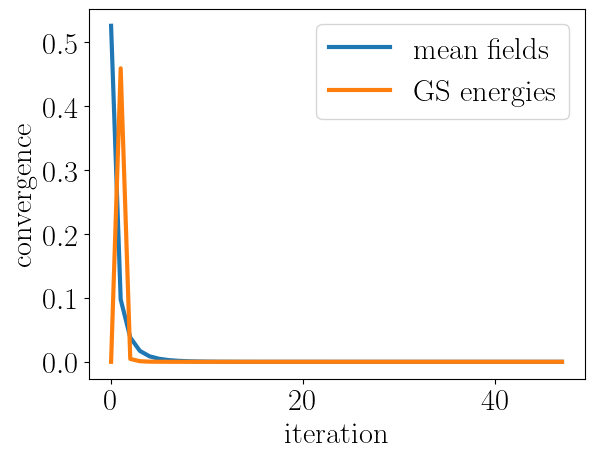

In [140]:
plt.plot(conv_fields_arr,label='mean fields',linewidth=3)
plt.plot(conv_energy_arr,label='GS energies',linewidth=3)
plt.xlabel('iteration')
plt.ylabel('convergence')
plt.legend()

In [138]:
gs_energy_init

-4.472135954999579